In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
!pip install config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
raw_data = pd.read_csv("insurance.csv")

In [8]:
#Data Cleaning - Numberize the data(Sex, Somker, Region)

from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df1 = raw_data
df1['sex'] = label.fit_transform(raw_data['sex'])
df1['smoker'] = label.fit_transform(raw_data['smoker'])
df1['region'] = label.fit_transform(raw_data['region'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
df1.iloc[2]

age           28.000
sex            1.000
bmi           33.000
children       3.000
smoker         0.000
region         2.000
charges     4449.462
Name: 2, dtype: float64

In [10]:
# ds_1 =  pd.DataFrame()
# ds_0 = pd.DataFrame()
# for i in range(1,df1.size):
#   if df1.at[i,'smoker'] == 1:
#     ds_1.add(df1.iloc[i])
#     #print(ds_1)
#   else:
#     ds_0.add(df1.iloc[i])
#     #print(ds_0)

In [11]:
smoker = df1.loc[df1['smoker'].isin([1])]
non_smoker = df1.loc[df1['smoker'].isin([0])]

In [12]:
ns = non_smoker.sample(n=274, random_state=1)

In [13]:
ns

,age,sex,bmi,children,smoker,region,charges
1004,47,1,19.190,1,0,0,8627.54110
864,51,1,25.400,0,0,3,8782.46900
193,56,0,26.600,1,0,1,12044.34200
840,21,1,31.100,0,0,3,1526.31200
201,48,0,32.230,1,0,2,8871.15170
...,...,...,...,...,...,...,...
820,45,1,33.700,1,0,3,7445.91800
1191,41,0,21.755,1,0,0,13725.47184
870,50,1,36.200,0,0,3,8457.81800
999,36,0,26.885,0,0,1,5267.81815


In [14]:
classifier_frames = [smoker, ns]
df = pd.concat(classifier_frames)

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
11,62,0,26.290,0,1,2,27808.72510
14,27,1,42.130,0,1,2,39611.75770
19,30,1,35.300,0,1,3,36837.46700
23,34,0,31.920,1,1,0,37701.87680
...,...,...,...,...,...,...,...
820,45,1,33.700,1,0,3,7445.91800
1191,41,0,21.755,1,0,0,13725.47184
870,50,1,36.200,0,0,3,8457.81800
999,36,0,26.885,0,0,1,5267.81815


In [16]:
X_L = df.drop('smoker', axis = 1).values
y_L = df['smoker']

y_L = y_L.astype(int)


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X_L,y_L)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [18]:
#Improtance 
fi_col = []
fi = []

for i,column in enumerate(raw_data.drop('smoker', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for age is : 0.044862540552411935
The feature importance for sex is : 0.0
The feature importance for bmi is : 0.10483872269575147
The feature importance for children is : 0.022718225992073512
The feature importance for region is : 0.003649635036496351
The feature importance for charges is : 0.8239308757232668


In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [20]:
# first one
X_train, X_test, y_train, y_test = train_test_split(X_L, y_L, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

In [21]:
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [22]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[-0.0655244 ,  0.0863435 , -0.19792367, -0.08792067,  0.36826806,
         0.00040367]])

In [23]:

# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))



The Training Accuracy is:  0.9543147208121827
The Testing Accuracy is:  0.9545454545454546


In [24]:
import math

def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

In [25]:
lgy = pred_proba[:,0]
lgx = X_train[:,-1]
l = y_train

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


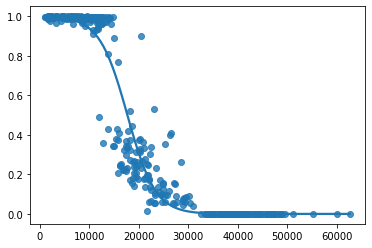

In [26]:
sns.regplot(x=lgx, y=lgy, data=0.00040367, logistic=True, ci=None)

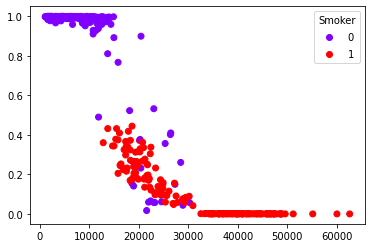

In [27]:
fig, ax = plt.subplots()
scatter=plt.scatter(lgx,lgy, c=l, cmap='rainbow')

legend1 = ax.legend(*scatter.legend_elements(),
                     title="Smoker")

In [28]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
11,62,0,26.290,0,1,2,27808.72510
14,27,1,42.130,0,1,2,39611.75770
19,30,1,35.300,0,1,3,36837.46700
23,34,0,31.920,1,1,0,37701.87680
...,...,...,...,...,...,...,...
820,45,1,33.700,1,0,3,7445.91800
1191,41,0,21.755,1,0,0,13725.47184
870,50,1,36.200,0,0,3,8457.81800
999,36,0,26.885,0,0,1,5267.81815


In [29]:
X_GMM = df
y_GMM = df['smoker']

y_GMM = y_GMM.astype(int)

print(X_GMM.shape)
print(y_GMM.shape)
X_train, X_test, y_train, y_test = train_test_split(X_GMM, y_GMM, train_size = 0.8, test_size=0.2, random_state=15)


(548, 7)
(548,)


In [36]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)

gmm.fit(df)

GaussianMixture(n_components=2)

In [37]:
identified_clusters2=gmm.fit_predict(df)
data_with_clusters2= pd.DataFrame(df, columns=['age',	'sex',	'bmi',	'children',	'smoker',	'region',	'charges'])
data_with_clusters2['Clusters2']=identified_clusters2

In [38]:
data_with_clusters2['name Clusters2']=data_with_clusters2['Clusters2']
data_with_clusters2['name Clusters2']=data_with_clusters2['Clusters2'].apply(str)
data_with_clusters2['name Clusters2']= data_with_clusters2['name Clusters2'].map({'0':'low_charges','1':'hig_charges'})

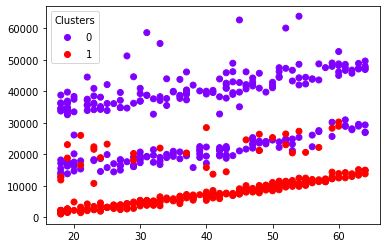

In [39]:
fig, ax = plt.subplots()
scatter=plt.scatter(data_with_clusters2['age'],data_with_clusters2['charges'], c=data_with_clusters2['Clusters2'], cmap='rainbow')

legend1 = ax.legend(*scatter.legend_elements(),
                     title="Clusters")

In [ ]:
gmm.predict(X_test).sum()


In [ ]:
y_test.sum()

In [ ]:
predictions5 = identified_clusters2


In [ ]:
print(np.mean(np.absolute(predictions5-y5)))
print(np.mean((predictions5-y5)**2))
print(r2_score(y5,predictions5))